<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Cory!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
 
Hello Cory, 
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my more detailed feedaback within your project file in the `Reviewer's comment v1` section.
    
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2</b>
    
<b>General Feedback</b> 
   

Thank you for submitting your project with improvements 🙌 

I've provided further insights in response to your comments. Look for sections labeled `Reviewer's comment v2`.

Remember, if you have any questions or need clarification on any point, don't hesitate to contact your tutor.
</div>


As asked by management, I will be going over the numbers in this Data Frame to help our marketing team decide where we need to be spending our advertising dollars! There is a lot of data here from around the world and there are four main areas im going to be focusing on to help with my analasis, North Americas Sales, Europes Sales, Japans Sales and our Other category, (Other meaning our sales in multiple other countries). Through this analasis we will be seeing which games have done the best but also determine the games that we will not focus on as much in the future. So, with that being said lets dive in!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added information about the project goal. Could be also helpful to share steps you will complete.

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head(10))
print(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Just as a quick thought from looking at the data above. The North America market appears to out sell all other sales areas, in some cases combind! 

In [3]:
platform_counts = df['Platform'].value_counts()
duplicate_platforms = platform_counts[platform_counts > 1]

print("Duplicate Platforms:\n", duplicate_platforms)

Duplicate Platforms:
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
Name: Platform, dtype: int64


In [4]:
df['Platform'] = df['Platform'].str.lower()  
df['Platform'] = df['Platform'].str.strip()  
df['Platform'] = df['Platform'].str.replace(r'[^a-z0-9]', '', regex=True)  

platform_corrections = {
    "ps": "playstation",
    "ps1": "playstation",
    "psx": "playstation",
    "ps2": "playstation2",
    "ps3": "playstation3",
    "ps4": "playstation4",
    "ps5": "playstation5",
    "xb": "xbox",
    "xbox360": "xbox360",
    "xboxone": "xboxone",
    "xboxseriesx": "xboxx",
    "snes": "supernintendo",
    "ds": "nintendods",
    "3ds": "nintendo3ds",
    "wii": "wii",
}


df['Platform'] = df['Platform'].replace(platform_corrections)

print("Unique Platform Names After Cleaning:\n", df['Platform'].unique())
df.to_csv("cleaned_data.csv", index=False)


Unique Platform Names After Cleaning:
 ['wii' 'nes' 'gb' 'nintendods' 'x360' 'playstation3' 'playstation2'
 'supernintendo' 'gba' 'playstation4' 'nintendo3ds' 'n64' 'playstation'
 'xbox' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat' 'scd'
 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


In [5]:
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df.isnull().sum()/len(df),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
Critic_Score,8578,0.513
Rating,6766,0.405
User_Score,6701,0.401
Year_of_Release,269,0.016
Name,2,0.000
Platform,0,0.000
Genre,2,0.000
NA_sales,0,0.000
EU_sales,0,0.000
JP_sales,0,0.000


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Could you please first check the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:
   

    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)


In [6]:
df.fillna(value=np.nan, inplace=True)

print("\nMissing Values Per Column:\n")
print(df.isnull().sum())


Missing Values Per Column:

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [7]:
df.columns = df.columns.str.lower()

required_types = {
    'name': 'string',              
    'platform': 'string',          
    'year_of_release': 'Int64',    
    'genre': 'string',             
    'na_sales': 'float',           
    'eu_sales': 'float',           
    'jp_sales': 'float',           
    'other_sales': 'float',        
    'critic_score': 'float',       
    'user_score': 'float',         
    'rating': 'string'             
}

for col, dtype in required_types.items():
    if col in df.columns:
        if dtype == 'string':
            df[col] = df[col].astype(str).str.lower()  
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce') 
            
print("\nUpdated Column Data Types:\n")
print(df.dtypes)


Updated Column Data Types:

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Regarding the column names change, everything is correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

You could also update columns in the following way:
    
`df.columns = df.columns.str.lower()`

After looking at the data that is missing, I have come to the conclusion that based on the desires of the company and the information that is being questioned. I don't feel it necessary to fill in the missing data points as they will not effect the end results of my analysis of the question about where to put money enough to make a large difference in the out come of the analysis results. Based on the missing data, I feel like its safe to say that 1, the 'year of release' was most likely from someone forgetting to add all the information, possibly multiple people soing the same task causing this mistake. 2, the 'critic score' could simply be that 8578 of those critics just didn't leave a score for the games. Finally, the 'user score' is probably the same reason as the 'critic score'. Those users just didn't feel like they needed to leave a score or just forgot.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
   
    
Due to the nature of our dataset all games are not relevant to each other.
    
`year_of_release`, `name`, `genre` - what is the volume, maybe we could just remove them?
   
    
`rating` column could be filled with any placeholder (e.g. "unknown")? 
    
Additionally, in the next steps of our analysis, we need to analyze the rating by region, and it is preferable to analyze the games without a rating at this stage.    

<div class="alert alert-info"> <b>Student comments:</b> I am also confused at this suggestion. I am not saying in anyway that you are wrong, more making sure that I understood the assignment! From my understanding most of the data that is here realistically wont even be used in our analysis of the data. This being the reason I made to commentary above. Am I wrong in my assumptions here? I am more then happy to do whatever is needed, this being said, I don't want to overcrowd my analysis with data that wont effect the out come or dilude the major points that I feel need to be made in order to give the company a straight forward answer as to where that marketing money should go based on the recent (2013 - 2016) time period for the 2017 marketing campagin.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>
   
You're not wrong in thinking that not all data will be relevant to the final analysis, and it's great that you're considering clarity and focus. That said, the rating column could be interesting to fill in, as it might provide valuable insights when checked later by region, genre, etc. Even if it's not used immediately, having that data available could help refine the recommendations for the marketing campaign.

In [9]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']])

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,wii sports,41.36,28.96,3.77,8.45,82.54
1,super mario bros.,29.08,3.58,6.81,0.77,40.24
2,mario kart wii,15.68,12.76,3.79,3.29,35.52
3,wii sports resort,15.61,10.93,3.28,2.95,32.77
4,pokemon red/pokemon blue,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,0.00,0.00,0.01,0.00,0.01
16711,lma manager 2007,0.00,0.01,0.00,0.00,0.01
16712,haitaka no psychedelica,0.00,0.00,0.01,0.00,0.01
16713,spirits & spells,0.01,0.00,0.00,0.00,0.01


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 


In [10]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,nan,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,nan,31.38


In [11]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

def categorize_year(year):
    if year <= 1995:
        return 'Classic'
    elif 1996 <= year <= 2010:
        return 'Modern'
    elif year >= 2011:
        return 'New'
    else:
        return 'Unknown'

df['time_period'] = df['year_of_release'].apply(categorize_year)


df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


sales_by_period = df.groupby('time_period')['total_sales'].sum()

print('\nTotal Sales by Time Period (in millions): ')
print(sales_by_period)


Total Sales by Time Period (in millions): 
time_period
Classic     750.00
Modern     6112.68
New        1954.11
Unknown      98.92
Name: total_sales, dtype: float64


In [12]:
def categorize_time_period(year):
    if pd.isna(year):  
        return 'Unknown'
    elif year <= 1995:
        return 'Classic'
    elif 1996 <= year <= 2010:
        return 'Modern'
    else:
        return 'New'
    
df['time_period'] = df['year_of_release'].apply(categorize_time_period)
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[sales_columns].sum(axis=1)
sales_summary = df.groupby(['time_period', 'platform'])['total_sales'].sum().reset_index()
total_sales_by_period = df.groupby('time_period')['total_sales'].sum()

print("Game Total Sales by Time Period:")
print(total_sales_by_period)

print("\n Total Sales by Platform within Each Time Period:")
display(sales_summary.head(60))

Game Total Sales by Time Period:
time_period
Classic     750.00
Modern     6112.68
New        1954.11
Unknown      98.92
Name: total_sales, dtype: float64

 Total Sales by Platform within Each Time Period:


,time_period,platform,total_sales
0,Classic,2600,86.48
1,Classic,3do,0.10
2,Classic,gb,118.13
3,Classic,gen,30.77
4,Classic,gg,0.04
5,Classic,nes,251.05
6,Classic,ng,1.34
7,Classic,nintendods,0.02
8,Classic,pc,20.19
9,Classic,playstation,41.99


In [13]:
filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

display(filtered_df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,time_period
16,grand theft auto v,playstation3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05,New
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27,New
31,call of duty: black ops 3,playstation4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,nan,14.63,New
33,pokemon x/pokemon y,nintendo3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,nan,14.60,New
42,grand theft auto v,playstation4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01,New
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01,New
16710,samurai warriors: sanada maru,playstation3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01,New
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01,New


As we can tell from the above data something happens between the 'Modern' and the 'New' time periods, game sales dropped drastically! Even if we were to take the 98 million in sales that are unknown and add it to 'New'. Moving forward in this analysis im going to focus on the 2013 through 2016 range so we can prep for the up coming 2017 year to see if we can do a few things. 1, see if we can raise the numbers from this time period and increase over all sales through marketing. 2, to see which market is going to be best to put our advertising dollars toward in order to get the best ROI and possibly lay the foundation for future growth in all other markets.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

Could you please create graphs to answer the following questions: 
    
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

<div class="alert alert-info"> <b>Student comments:</b> out of curiosity sake, at this point in the project we have been instructed to disregard all data beside the data that will help us analyse to see where the advertising campaign should be. I am more then happy to write that code, that being said I was trying to stick to the relevant information needed to solving the companies problem vs overwhelming them. I hope what I am asking makes sense. I am just trying to give them a pizza vs a 17 course meal that isnt needed if that makes sense.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>

I totally get your approach—you want to keep things focused and avoid unnecessary complexity. However, without checking these steps, it won’t be clear to the reader why certain decisions were made or why this specific period was chosen. These graphs can provide context and justify the selection of relevant data, making the final analysis more compelling and well-supported.

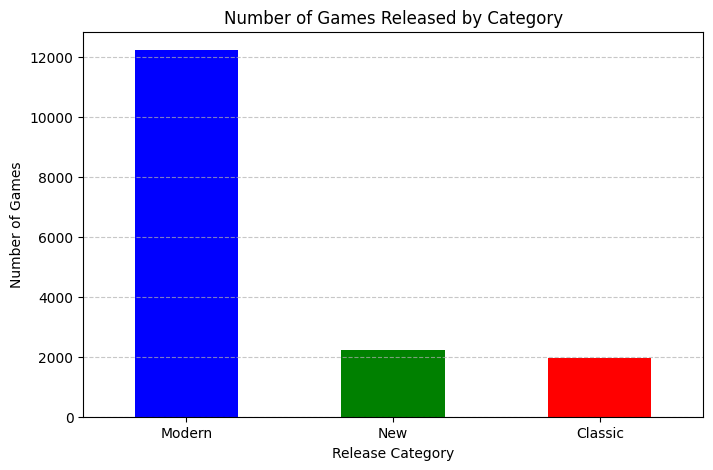

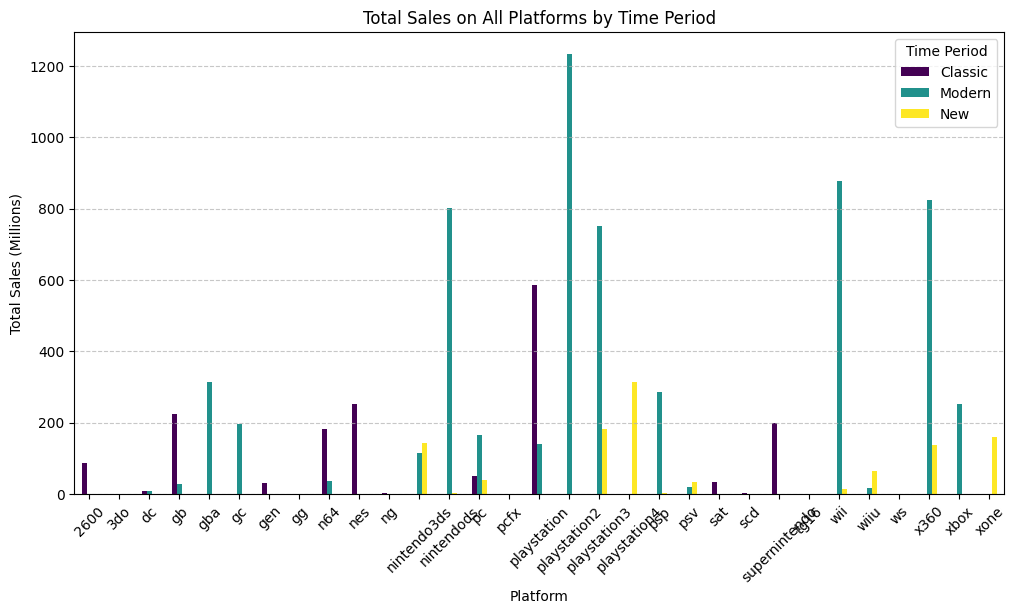

In [14]:
df = df.dropna(subset=["year_of_release"])

df["year_of_release"] = df["year_of_release"].astype(int)

df["time_period"] = pd.cut(
    df["year_of_release"],
    bins=[0, 1999, 2012, df["year_of_release"].max()],  
    labels=["Classic", "Modern", "New"],  
    right=True
)

games_per_category = df["time_period"].value_counts()

plt.figure(figsize=(8, 5))
games_per_category.plot(kind="bar", color=["blue", "green", "red"])

plt.title("Number of Games Released by Category")
plt.xlabel("Release Category")
plt.ylabel("Number of Games")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
sales_by_platform_period = df.groupby(["time_period", "platform"])["total_sales"].sum().unstack()

sales_by_platform_period.T.plot(kind="bar", figsize=(12, 6), colormap="viridis")

plt.title("Total Sales on All Platforms by Time Period")
plt.xlabel("Platform")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.legend(title="Time Period")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Interestingly enough it looks like in the 'Modern' time period there were more games released then in both the 'Classic' and 'New' time periods combind. 'Modern' was absolutely the prime of video games! With this marketing campagin we can hopefully add to the 'New' catergory and have more games come out and keep the gaming scene alive!


In [15]:
filtered_df = df[(df["year_of_release"] >= 2013) & (df["year_of_release"] <= 2016)]

sales_by_platform_filtered = filtered_df.groupby("platform")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

na_sales = sales_by_platform_filtered["na_sales"]
eu_sales = sales_by_platform_filtered["eu_sales"]
jp_sales = sales_by_platform_filtered["jp_sales"]
other_sales = sales_by_platform_filtered["other_sales"]

print("North America Sales:\n", na_sales)
print("Europe Sales:\n", eu_sales)
print("Japan Sales:\n", jp_sales)
print("Other Sales:\n", other_sales)

North America Sales:
 platform
nintendo3ds      38.20
nintendods        0.57
pc               11.11
playstation3     63.50
playstation4    108.74
psp               0.00
psv               5.04
wii               6.56
wiiu             29.21
x360             81.66
xone             93.12
Name: na_sales, dtype: float64
Europe Sales:
 platform
nintendo3ds      30.96
nintendods        0.85
pc               25.36
playstation3     67.81
playstation4    141.09
psp               0.17
psv               6.10
wii               5.93
wiiu             19.85
x360             42.52
xone             51.59
Name: eu_sales, dtype: float64
Japan Sales:
 platform
nintendo3ds     67.81
nintendods       0.00
pc               0.00
playstation3    23.35
playstation4    15.96
psp              3.29
psv             18.59
wii              0.05
wiiu            10.88
x360             0.51
xone             0.34
Name: jp_sales, dtype: float64
Other Sales:
 platform
nintendo3ds      6.28
nintendods       0.12
pc            

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct and data has been filtered correctly, as we want to evaluate only recent trends. 

<Figure size 1200x600 with 0 Axes>

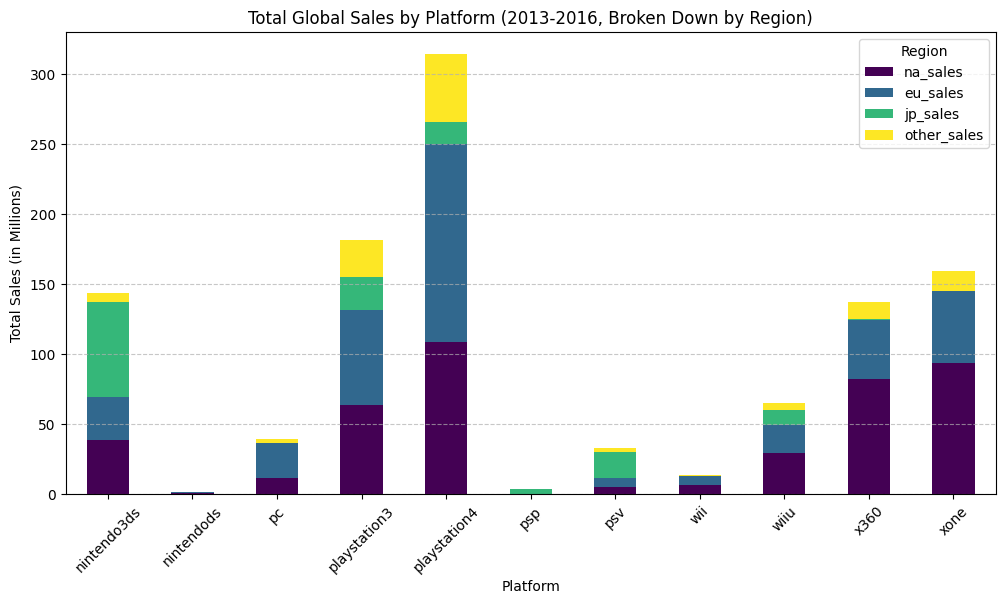

In [16]:
filtered_df = df[(df["year_of_release"] >= 2013) & (df["year_of_release"] <= 2016)]

sales_by_platform_filtered = filtered_df.groupby("platform")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

plt.figure(figsize=(12, 6))
sales_by_platform_filtered.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Total Global Sales by Platform (2013-2016, Broken Down by Region)")
plt.xlabel("Platform")
plt.ylabel("Total Sales (in Millions)")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

The above box plot shows us the total global sales all while breaking things up into the four different regions. This is very great information in our quest to find where we need to be putting our advertising dollars not only from a platform stance but also in a sales area way as well. Obviously, Playstation4 is our biggest seller out of all platforms. Something that is interesting to me is that after the top 5 platforms we drop roughly 100 million dollars in sales and it fades away with each platform there after. I wouldn't recommend spending much money on any of those six platforms. It is also interesting to me that in our top five platforms it is incredibly clear that our Japan market favors Playstation and even more Nintendo. We could potentially look at allocating funds in different distributions as to help grow the markets for those platforms vs Xbox.

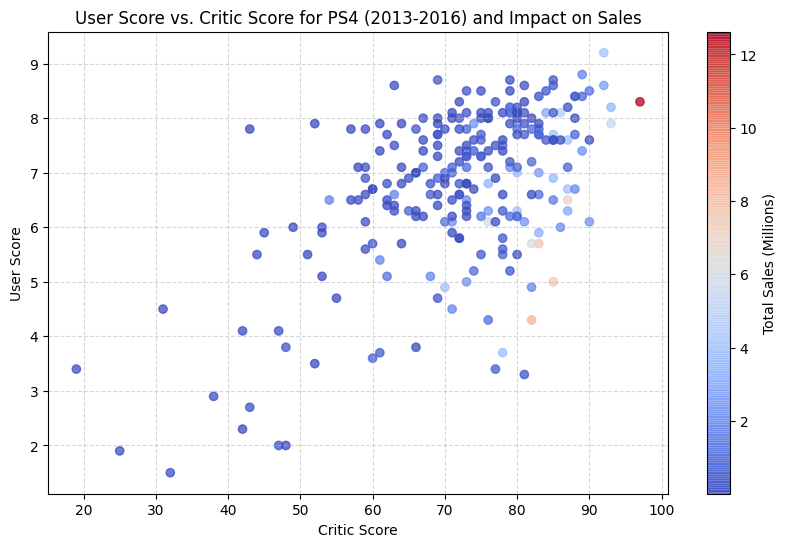

In [17]:
ps4_df = df[(df["platform"] == "playstation4") & (df["year_of_release"] >= 2013) & (df["year_of_release"] <= 2016)].copy()
ps4_df.loc[:,"user_score"] = pd.to_numeric(ps4_df["user_score"], errors="coerce")
ps4_df = ps4_df.dropna(subset=["user_score", "critic_score", "na_sales", "eu_sales", "jp_sales", "other_sales"])
ps4_df["total_sales"] = ps4_df["na_sales"] + ps4_df["eu_sales"] + ps4_df["jp_sales"] + ps4_df["other_sales"]


plt.figure(figsize=(10, 6))
scatter = plt.scatter(ps4_df["critic_score"], ps4_df["user_score"], c=ps4_df["total_sales"], cmap="coolwarm", alpha=0.75)
cbar = plt.colorbar(scatter)
cbar.set_label("Total Sales (Millions)")
plt.title("User Score vs. Critic Score for PS4 (2013-2016) and Impact on Sales")
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

I was expecting a much different result. The correlation between to users score and the critic score for the most part are close to each other. As we can tell from the data there is a positive correlation between the two. the part that is interesting to me is that most of the games that had high scores between both sets of scores have fewer sales then the top five games for total sales! One would assume that with higher scores from both the users and critics the higher the sales of that game however between the years of 2013 and 2016 that is not the case!

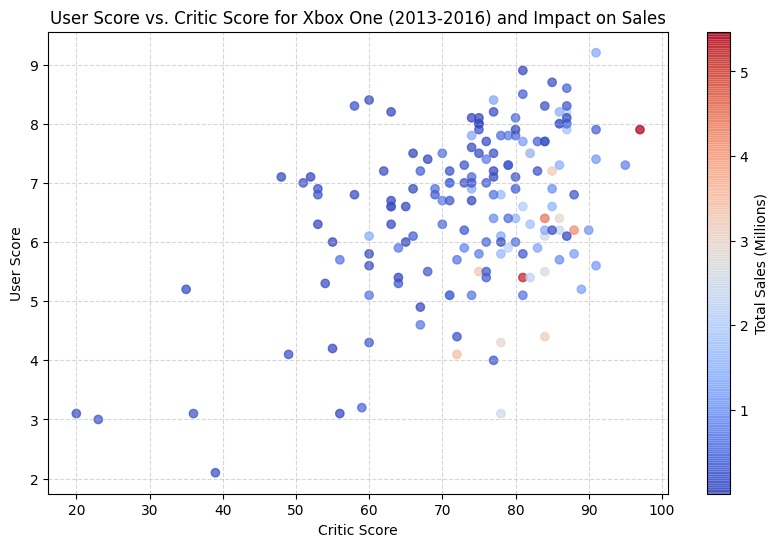

In [18]:
xbox_one_df = df[(df["platform"] == "xone") & (df["year_of_release"] >= 2013) & (df["year_of_release"] <= 2016)].copy()
xbox_one_df["user_score"] = pd.to_numeric(xbox_one_df["user_score"], errors="coerce")
xbox_one_df = xbox_one_df.dropna(subset=["user_score", "critic_score", "na_sales", "eu_sales", "jp_sales", "other_sales"])
xbox_one_df["total_sales"] = xbox_one_df["na_sales"] + xbox_one_df["eu_sales"] + xbox_one_df["jp_sales"] + xbox_one_df["other_sales"]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(xbox_one_df["critic_score"], xbox_one_df["user_score"], c=xbox_one_df["total_sales"], cmap="coolwarm", alpha=0.75)
cbar = plt.colorbar(scatter)
cbar.set_label("Total Sales (Millions)")
plt.title("User Score vs. Critic Score for Xbox One (2013-2016) and Impact on Sales")
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


Intersetingly enough again when we switch the data from Playstation 4 to Xbox One, we have a positive correlation between both users and critics scores yet still a high volume of lower total sales. One difference between the two platforms is that the Xbox One has more higher selling games then the Playstation 4!

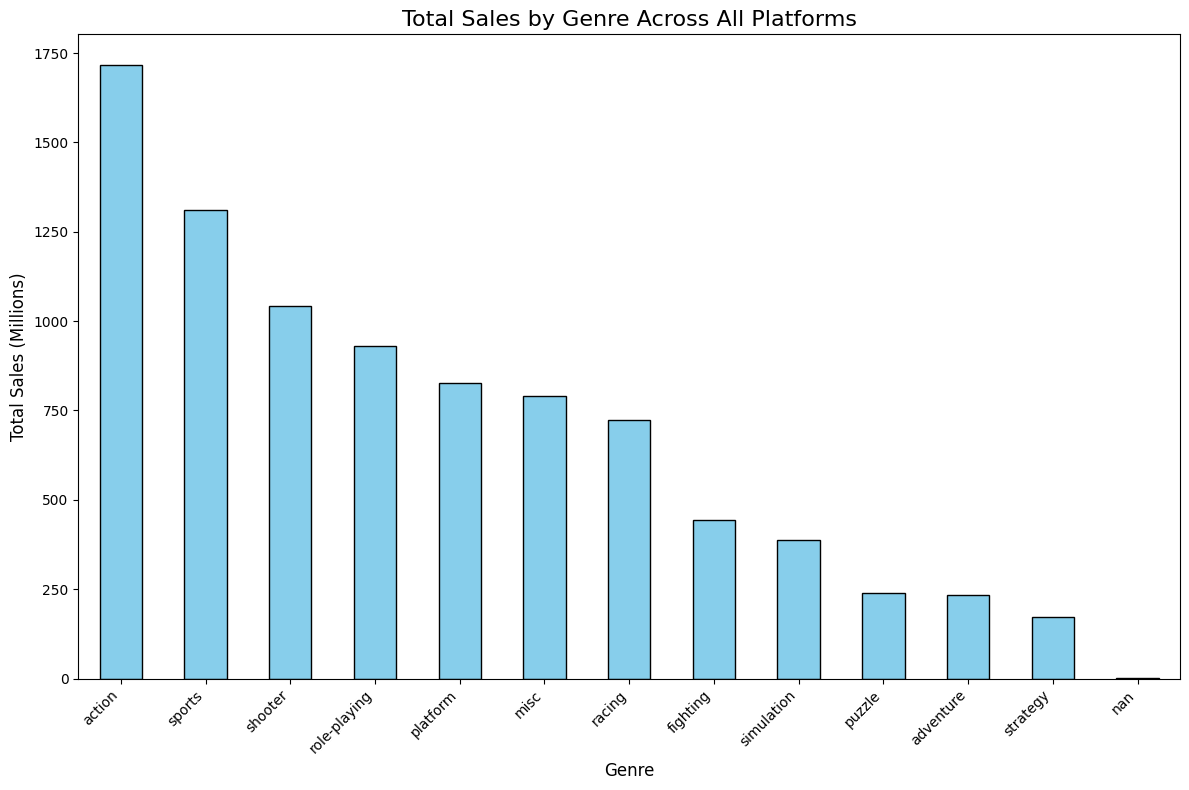

genre
action          0.519057
adventure       0.180456
fighting        0.528865
misc            0.459204
nan             1.210000
platform        0.940262
puzzle          0.421599
racing          0.590122
role-playing    0.628683
shooter         0.803519
simulation      0.452695
sports          0.567940
strategy        0.256419
Name: total_sales, dtype: float64


In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Sales by Genre Across All Platforms", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Total Sales (Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
avg_revenue_by_genre = df.groupby("genre")["total_sales"].mean()

print(avg_revenue_by_genre)

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Indeed here we have the most popular genre - Action (total revenue) but could you also check avg revenue per game/genre. 


<div class="alert alert-info"> <b>Student comments:</b> I added the neccisary code to show the avg revenue per game above!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Great 👏 Thank you for extending this part. 

From the above graph we see that across all platforms, Action, Sports, and Shooter type games are billion dollar areas. This information will also help us decide where we want to put advertising dollars based on profit margins alone! I would recommend staying away from the lower grossing genres such as Puzzle, Adventure and Strategy as there is profit to be made just not nearly as much as our top three.

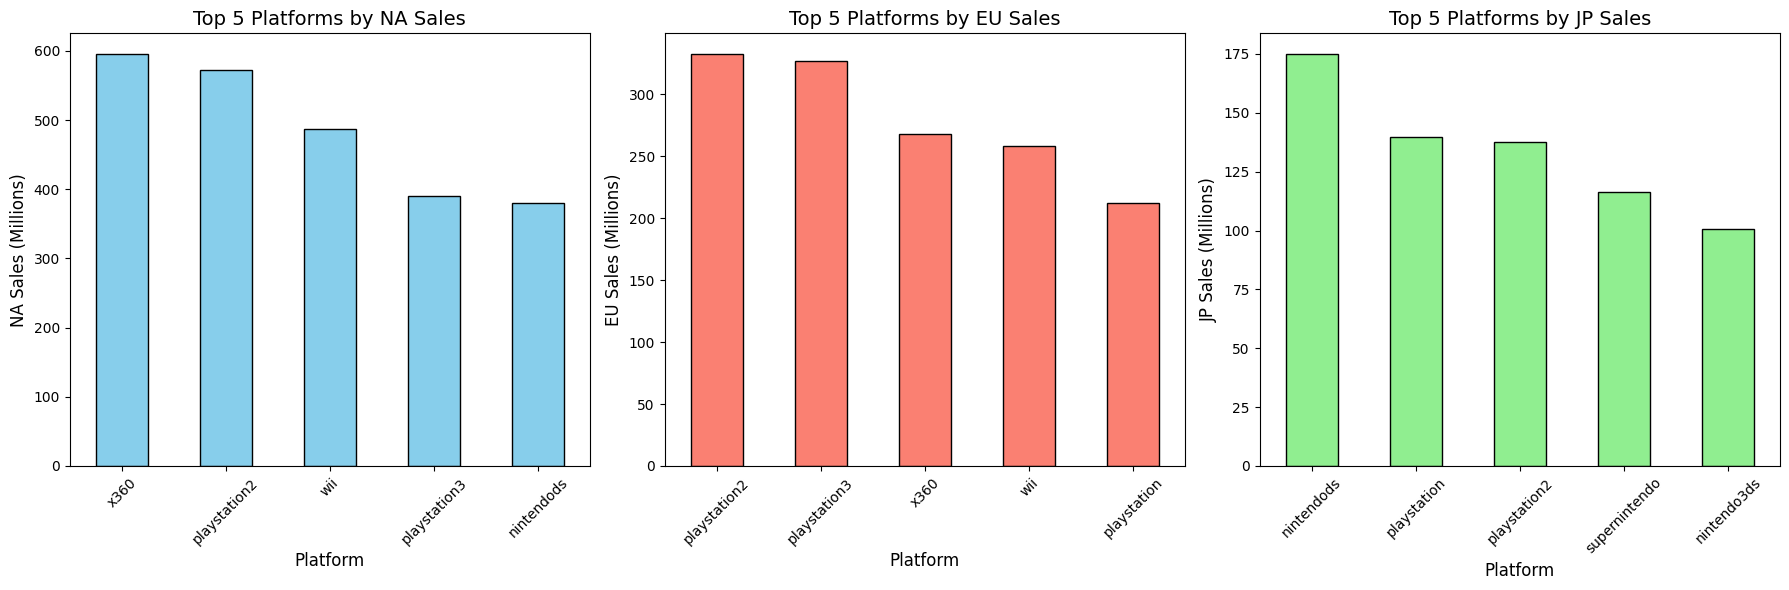

In [20]:
df_filtered = df[(df["year_of_release"] >= 2013) & (df["year_of_release"] <= 2016)]

na_sales_top = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_sales_top = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_sales_top = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

na_sales_top.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Top 5 Platforms by NA Sales', fontsize=14)
axes[0].set_xlabel('Platform', fontsize=12)
axes[0].set_ylabel('NA Sales (Millions)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

eu_sales_top.plot(kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Top 5 Platforms by EU Sales', fontsize=14)
axes[1].set_xlabel('Platform', fontsize=12)
axes[1].set_ylabel('EU Sales (Millions)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

jp_sales_top.plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[2])
axes[2].set_title('Top 5 Platforms by JP Sales', fontsize=14)
axes[2].set_xlabel('Platform', fontsize=12)
axes[2].set_ylabel('JP Sales (Millions)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Looks great! 

As a second approach you could also arrange subplots using plotly in the following way: 
    
```
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()
```

There appear to be a lot of differences in the purchase of gaming consoles based on sales region. America spends almost double of Europe and almost three times what japan does!! America's top three platforms are evenly split between Xbox, Playstation and Nintendo. Europe spends close to a billion on Playstation alone! An interesting point to make about the Japan market is that between all five of their top platforms, it is roughly only 80 million more then what America spent on the Xbox 360! America is where I feel we need to be focusing in on advertising dollars as they are the majority of dollars spent in the gaming world!

In [21]:
sales_regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
top_genres = {}
for region in sales_regions:
    top_genres[region] = df.groupby("genre")[region].sum().nlargest(5)

for region, data in top_genres.items():
    display(f"\nTop 5 Genres in {region.replace('_sales', '').upper()} Sales:\n")
    print(data)

'\nTop 5 Genres in NA Sales:\n'

genre
action      863.17
sports      671.20
shooter     584.83
platform    444.44
misc        399.57
Name: na_sales, dtype: float64


'\nTop 5 Genres in EU Sales:\n'

genre
action     510.99
sports     371.33
shooter    314.52
racing     234.49
misc       210.60
Name: eu_sales, dtype: float64


'\nTop 5 Genres in JP Sales:\n'

genre
role-playing    353.39
action          160.14
sports          134.93
platform        130.71
misc            107.02
Name: jp_sales, dtype: float64


'\nTop 5 Genres in OTHER Sales:\n'

genre
action     182.22
sports     132.21
shooter    103.33
racing      75.51
misc        73.10
Name: other_sales, dtype: float64


In [29]:
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
esrb_sales_mean = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()

display(esrb_sales)
display(esrb_sales_mean)
df["rating"].fillna("Unknown", inplace=True)
print(df.rating)

,na_sales,eu_sales,jp_sales
rating,,,
ao,1.26,0.61,0.00
e,1274.24,703.87,197.96
e10+,345.50,183.35,40.20
ec,1.53,0.11,0.00
k-a,2.56,0.27,1.46
m,742.89,480.00,63.58
nan,1227.62,610.18,836.77
rp,0.00,0.03,0.00
t,747.60,421.79,150.70


,na_sales,eu_sales,jp_sales
rating,,,
ao,1.260000,0.610000,0.000000
e,0.324978,0.179513,0.050487
e10+,0.248026,0.131622,0.028859
ec,0.191250,0.013750,0.000000
k-a,0.853333,0.090000,0.486667
m,0.483652,0.312500,0.041393
nan,0.183830,0.091372,0.125302
rp,0.000000,0.030000,0.000000
t,0.257349,0.145194,0.051876


0          e
1        nan
2          e
3          e
4        nan
        ... 
16710    nan
16711    nan
16712    nan
16713    nan
16714    nan
Name: rating, Length: 16446, dtype: object


It appears from the above tables that sales are effected by the ESRB Rating. In all three of our major sales regions, when looking between 'E' (Everyone), 'T' (Teen), and 'M' (Mature) sales drop a one third even up to half in those regions. Obviously this will be effected by numerous variables that we cant account for on a measurable scale. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

As you've noticed thare are a lot of unknowns in the rating column (that have been replced with Unknown), especially for Japan. Can you please add it also to the graph?

I think it is a very important information in itself about the market and what rating system is used in this region.

<div class="alert alert-info"> <b>Student comments:</b> which graph are we taking about so i can make the neccisary adjustments

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>

So, currently, you've created a plot only for the top five platforms. Could you please do the same for:
    
- The top five genres for each region.
- ESRB ratings for each region (first replacing missing values in the Rating column with a placeholder, e.g., "unknown," and then checking if certain regions have a higher number of unknowns).

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:
    H1:

<div class="alert alert-info"> <b>Student comments:</b> Just to clarify I did do the null hypothesis near the bottom of the project. Or did you mean that you would like other null hypothesis done else where?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>

Sure, for every statistical test, we need to state two hypotheses right before conducting the test:
    
- Null Hypothesis (H0) - states there is NO effect or NO relationship
- Alternative Hypothesis (H1) - states there IS an effect or relationship
    
Having these stated upfront:
- Makes your analytical thinking clear
- Helps readers follow your logic
- Shows what exactly you're testing
- Makes your statistical conclusions stronger

<div class="alert alert-info"> <b>Student comments:</b> H1 has been added
    

In [23]:
xone_user_scores = df[df['platform'] == 'xone']['user_score'].dropna()
pc_user_scores = df[df['platform'] == 'pc']['user_score'].dropna()
t_stat, p_value = stats.ttest_ind(xone_user_scores, pc_user_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average user scores between Xbox One and PC.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average user scores between Xbox One and PC.")

T-statistic: -4.38289526334195
P-value: 1.3037979620149106e-05
Reject the null hypothesis: There is a significant difference in average user scores between Xbox One and PC.


In [24]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

action_games = df[df['genre'] == 'action']['user_score'].dropna()
sports_games = df[df['genre'] == 'sports']['user_score'].dropna()

t_stat, p_value = stats.ttest_ind(action_games, sports_games)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average user scores between Action and Sports games.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average user scores between Action and Sports games.")

T-statistic: 1.8472797735322193
P-value: 0.06480928064420527
Fail to reject the null hypothesis: There is no significant difference in average user scores between Action and Sports games.


In the two above hypothesis, I was looking to see if there were no noticable differences (5%) between user scores in Xbox One and PC which came back as false due to there being a very large difference (more then 5%) in those scores. Next I wanted to test if there was a major difference (more the 5%) between user scores for Action games and Sports games. I was unable to reject this hypothesis due to there being less than a 5% difference between user score of both genres of games. 

Wow! What a lot of data we just went through! Now let's bring it full circle so that we can answer our begining question which was, Where do we spend money for our advertizing campagins? Not always a simple question but with the help from the information above I have come up with a few major take aways that can really help us hone in on some answers. First, our American region I our biggest spenders when it comes to gaming! They spent twice as much from 2013-2016 then our Eruopean region and they were only 80 million shy of spending more on one platform then all of our Japanese regions top five platforms! Second, our European region well over a billion dollars in their top 5 platforms. This would be a very easy market to spend a million or two for a very solid ROI. Finally, Japan should not be forgotten about. They did spend roughly around 680 million dollars between those four year! There is potential in all three of our major sales regions. To recap, First focus on the American region, Secondly, European region and last but not least maybe take some of the Nintendo ads to Japan as that was their number one platform.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    

